In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
from mpl_toolkits.mplot3d import Axes3D

#nie wiem czy to czegoś nie popsuje 
%matplotlib notebook

In [2]:
def generate_2D_linespace(start=-10,stop=11,step=1):
    xs=[]
    ys=[]
    for i in range (start,stop,step):
        for j in range(start,stop,step):
            xs.append(i)
            ys.append(j)
    return xs,ys




def paraboloid_eqn_noise(data,a,b):
    
    x,y=data
    noise = np.random.normal(-2,2,len(x))
    return ((x/a)**2+(y/b)**2)+noise   

def paraboloid_eqn(data,a,b):
    
    x,y=data
    return ((x/a)**2+(y/b)**2)


def fit_paraboloid(x,y,z):
    data=np.vstack((x,y))
    popt,pcov=opt.curve_fit(paraboloid_eqn,data,z,p0=[2,2])

def show_fit(x,y,z,popt):
    fig=plt.figure()
    ax=fig.add_subplot(111,projection='3d')
    ax.scatter3D(x,y,z)
    data=np.vstack((x,y))
    ax.scatter3D(x,y,paraboloid_eqn(data,popt[0],popt[1]))
    plt.show()

<IPython.core.display.Javascript object>


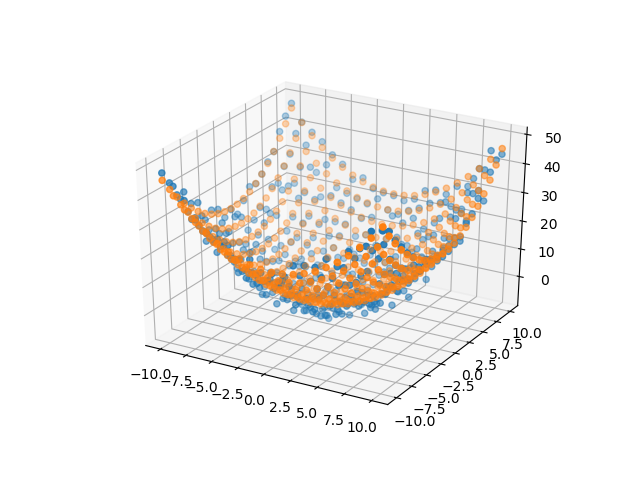

[ 0.01208936  0.0123719 ]


In [3]:

#Test
xs,ys=generate_2D_linespace()

data=np.vstack((xs,ys))
zdata=paraboloid_eqn_noise(data,2,2)

popt,pcov=opt.curve_fit(paraboloid_eqn,data,zdata,p0=[2,2])

show_fit(xs,ys,zdata,popt)

#Calculate standard deviation errors
perr = np.sqrt(np.diag(pcov))
print(perr)

<IPython.core.display.Javascript object>


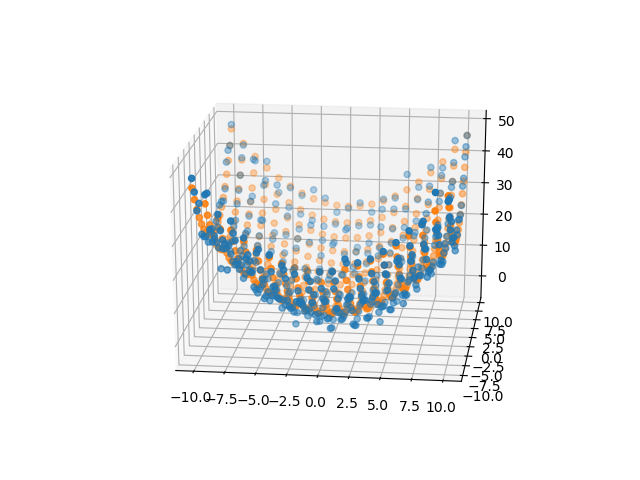